Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.46      0.48        48
           1       0.54      0.60      0.57        52

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.53      0.53      0.53       100

Confusion Matrix:
 [[22 26]
 [21 31]]


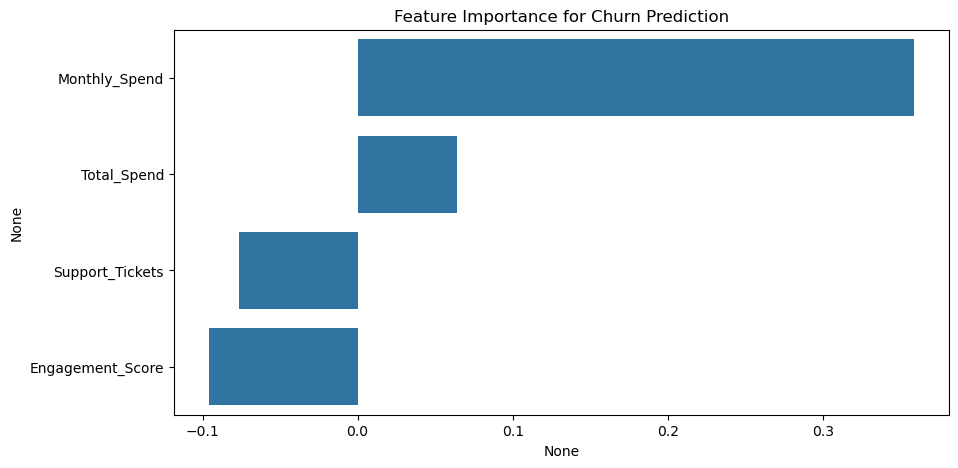

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset (Replace 'Customer_Subscription.csv' with actual path)
df = pd.read_csv("C:/Users/AMIT/Downloads/Customer_Subscription.csv")

# Data Preprocessing
df.drop(columns=['Customer_ID', 'Subscription_Start'], inplace=True)  # Drop irrelevant columns

# Select only numeric columns for median calculation
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Handle missing values

df = pd.get_dummies(df, columns=['Plan_Type'], drop_first=True)  # Encode categorical variables

y = df['Churned'].map({'Yes': 1, 'No': 0})  # Convert target variable to binary
X = df.drop(columns=['Churned'])

# Ensure all features are numeric before scaling
X_numeric = X.select_dtypes(include=['number'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(model.coef_[0], index=X_numeric.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance for Churn Prediction")
plt.show()